In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import lmfit
import corner

In [2]:
#Define Hubble parameter.I am using Barboza & Alcaniz parametrization: w(z)=w0+w1*z*(1+z)/1+z^2 
def Hz1(z1,H01,Om1,w0,w1):
    #the redshift dependence of the dark energy density using Barboza & Alcaniz parametrization:
    I=((1+z1)**(3*(1+w0)))*((1+z1**2))**(3*w1/2)
    E = np.sqrt((Om1*(1+z1)**3.) + (1-Om1)*I)
    HZ1 = H01*E
    return HZ1

In [3]:
#Define  random redshifts
num_zs = 1000
zs= np.linspace(0.01, 10., num=num_zs)

In [4]:
O_m=0.311
w_0=-0.9414
w_1=-0.28
H_0=67.66

In [5]:
#Hubble comoving parameter
Hz=Hz1(zs,H_0,O_m,w_0,w_1)/(1+zs)

In [6]:
#random error for Hz
error_sigma = 0.5
e1 = np.random.normal(0., error_sigma, Hz.shape)

In [7]:
H_zz= Hz + e1

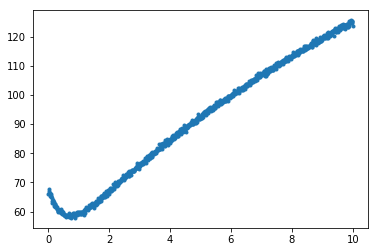

In [8]:
plt.plot(zs,H_zz, '.')

In [12]:
p = lmfit.Parameters()
p.add_many(('Om1',0.3,True,0.,2.),
           ('H01',70.,True,50.,100.),
           ('w0',-1.3,False,-3.,-0.3),
           ('w1',-0.28,True,-3.,3.))

def residual(p):
    v = p.valuesdict()
    return (Hz1(zs,v['H01'],v['Om1'],v['w0'],v['w1'])/(1+zs)-H_zz)/error_sigma

In [13]:
mi = lmfit.minimize(residual, p, method='leastsq', nan_policy='omit')

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 30
    # data points      = 1000
    # variables        = 3
    chi-square         = 1655.67923
    reduced chi-square = 1.66066121
    Akaike info crit   = 510.211334
    Bayesian info crit = 524.934600
[[Variables]]
    Om1:  0.27812514 +/- 0.00105484 (0.38%) (init = 0.3)
    H01:  71.4606359 +/- 0.13729945 (0.19%) (init = 70)
    w0:  -1.3 (fixed)
    w1:   0.23499469 +/- 0.01056987 (4.50%) (init = -0.28)
[[Correlations]] (unreported correlations are < 0.100)
    C(Om1, H01) = -0.989
    C(H01, w1)  = -0.459
    C(Om1, w1)  =  0.371


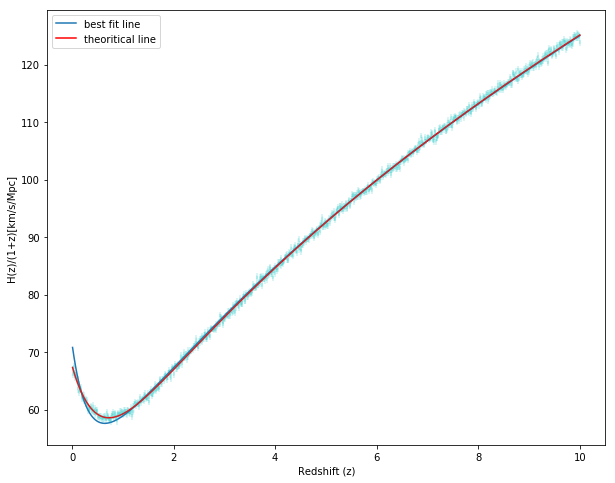

In [14]:
plt.figure(figsize=(10,8))
plt.errorbar(zs,H_zz,yerr=error_sigma,fmt='c',alpha=0.2)
#bestOde1= mi.params.valuesdict()['Ode1']
bestOm1 = mi.params.valuesdict()['Om1']
bestH01 = mi.params.valuesdict()['H01']
bestw0 = mi.params.valuesdict()['w0']
bestw1 = mi.params.valuesdict()['w1']
plt.plot(zs,Hz1(zs,bestH01,bestOm1,bestw0,bestw1)/(1+zs),'-',label="best fit line")
plt.plot(zs,Hz,'r',label="theoritical line")
plt.xlabel('Redshift (z)')
plt.ylabel('H(z)/(1+z)[km/s/Mpc]')
plt.legend(loc="upper left")
lmfit.report_fit(mi)

In [23]:
residuals=H_zz-Hz1(zs,bestH01,bestOm1,bestw0,bestw1)/(1+zs)

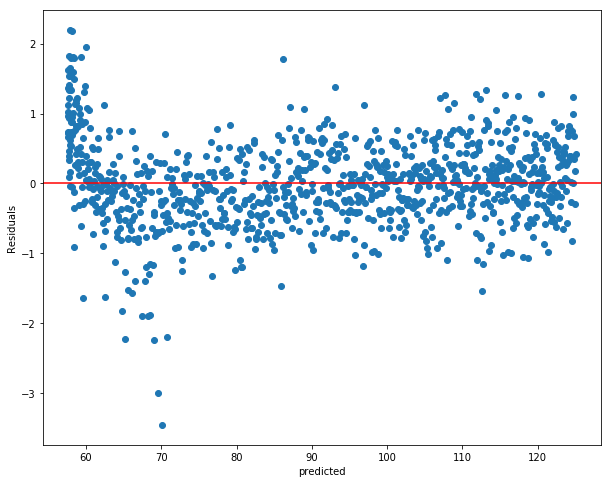

In [24]:
plt.figure(figsize=(10,8))
plt.plot(Hz1(zs,bestH01,bestOm1,bestw0,bestw1)/(1+zs),residuals,'o')
plt.xlabel('predicted')
plt.ylabel('Residuals')
plt.axhline(y=0., color='r', linestyle='-')
plt.show()

In [23]:
res = lmfit.minimize(residual, method='emcee', nan_policy='omit', burn=300, steps=1500, thin=1,
                         params=p, is_weighted=True)

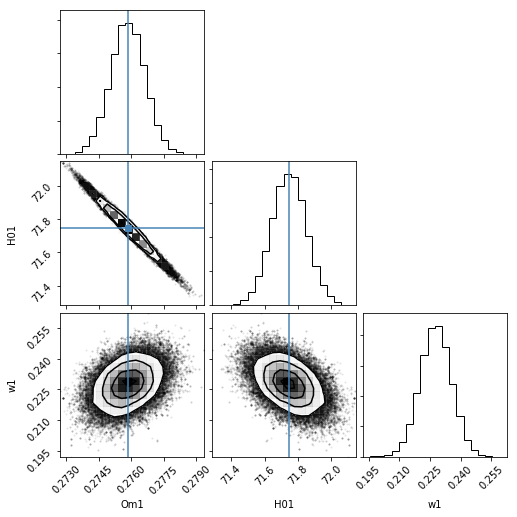

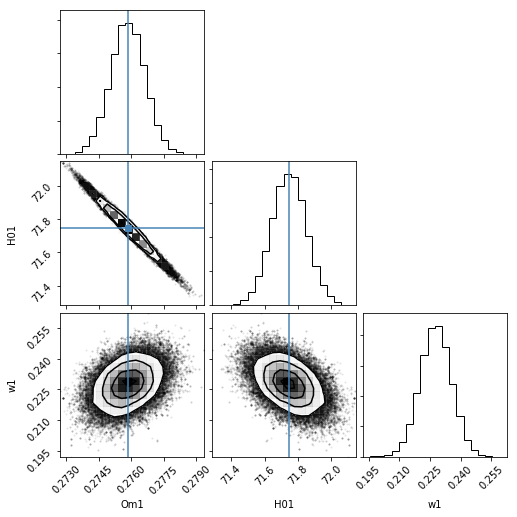

In [24]:
corner.corner(res.flatchain,labels=res.var_names, truths=list(res.params.valuesdict().values()))